# **EDA 2**

DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

Objective:

Using Adult dataset to perform data preprocessing, feature engineering, and feature selection techniques

# Data Exploration and Preprocesing

In [53]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
#loading the dataset
df = pd.read_csv('adult_with_headers.csv')

In [55]:
#head of dataset
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [56]:
#shape of dataset
df.shape

(32561, 15)

In [57]:
#datatypes of columns
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [58]:
#summary statics of dataset
df.describe().round(3)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000,32561.000,32561.000,32561.000,32561.000,32561.000
mean,38.582,189778.367,10.081,1077.649,87.304,40.437
std,13.640,105549.978,2.573,7385.292,402.960,12.347
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117827.000,9.000,0.000,0.000,40.000
50%,37.000,178356.000,10.000,0.000,0.000,40.000
75%,48.000,237051.000,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


In [59]:
#checking for missing values
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


No missing values in dataset

In [60]:
#scaling
#Applying standard Scaler technique
from sklearn.preprocessing import StandardScaler
numerical_columns=df.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
df_scaled= scaler.fit_transform(df[numerical_columns])
df_scaled= pd.DataFrame(df_scaled, columns=numerical_columns)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Scaling Techniques:

Standard Scaling: Scales features to have mean 0 and variance 1.

Min-Max Scaling: Scales features to a range [0, 1].

When to Use:

Standard Scaling: Useful for algorithms that assume data is normally distributed, like Logistic Regression or SVM.

Min-Max Scaling: Preferred when we need data in a specific range or using algorithms sensitive to the scale of data, like Neural Networks.

# Encoding Techniques

If number of categories are more than 5 then using label encoding technique else using one-hot encoding

In [61]:
#checking for unique values in workclass
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [62]:
#unique values in education
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [63]:
#unique values of marital_status
df['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [64]:
#unique values of occupation
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [65]:
#unique values of relationship
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [66]:
#unique values of race
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [67]:
#unique values of native country
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

Label Encoding

In [68]:
#applying label encoding to workclass, education, arital_status, occupation, relationship, native_country
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital_status'] = le.fit_transform(df['marital_status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['native_country'] = le.fit_transform(df['native_country'])


One-hot Encoding

In [69]:
#applying one-hot encoding to race, sex, income
df=pd.get_dummies(df,columns=['race'],dtype=int)
df=pd.get_dummies(df,columns=['sex'],dtype=int)
df=pd.get_dummies(df,columns=['income'],dtype=int)

In [70]:
#dataset after encoding
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,2174,0,...,39,0,0,0,0,1,0,1,1,0
1,50,6,83311,9,13,2,4,0,0,0,...,39,0,0,0,0,1,0,1,1,0
2,38,4,215646,11,9,0,6,1,0,0,...,39,0,0,0,0,1,0,1,1,0
3,53,4,234721,1,7,2,6,0,0,0,...,39,0,0,1,0,0,0,1,1,0
4,28,4,338409,9,13,2,10,5,0,0,...,5,0,0,1,0,0,1,0,1,0


Encoding techniques pros and cons

1) One-Hot Encoding:

Pros: No ordinal relationship assumption.

Cons: Can increase dimensionality significantly if many categories.

2) Label Encoding:

Pros: Simple and effective for ordinal data.

Cons: Assumes an ordinal relationship, which may not be appropriate for nominal data.

# Feature Engineering

Interaction between features (e.g., age and education):

The hypothesis here is that both age and education level (measured by Education_Num) play a significant role in income level. Older individuals with higher education might be more likely to earn more than $50K due to experience and higher qualifications.

By multiplying age and education level, we create an interaction term that captures the combined effect of these two variables on income. This could help the model detect the pattern that older people with more education are more likely to earn above $50K.

In [71]:
df['age_education_interaction'] = df['age'] * df['education_num']

Creating a Feature for Working Hours:

New Feature: hours_per_week_bucket

The hypothesis is that the number of hours someone works per week could have a strong impact on their income. For example, individuals working more hours are likely to earn more.

Bucketing this into categories like part-time, full-time, and overtime could help the model recognize these distinct patterns.

In [72]:
df['hours_per_week_bucket'] = pd.cut(df['hours_per_week'], bins=[0, 30, 40, 100], labels=['part-time', 'full-time', 'overtime'])

In [73]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_education_interaction,hours_per_week_bucket
0,39,7,77516,9,13,4,1,1,2174,0,...,0,0,0,1,0,1,1,0,507,full-time
1,50,6,83311,9,13,2,4,0,0,0,...,0,0,0,1,0,1,1,0,650,part-time
2,38,4,215646,11,9,0,6,1,0,0,...,0,0,0,1,0,1,1,0,342,full-time
3,53,4,234721,1,7,2,6,0,0,0,...,0,1,0,0,0,1,1,0,371,full-time
4,28,4,338409,9,13,2,10,5,0,0,...,0,1,0,0,1,0,1,0,364,full-time


capital_gain is the best candidate for log transformation because of its extreme right-skewness, presence of outliers, and zero values. Log transformation can reduce the effect of extreme values, making the feature more interpretable and suitable for machine learning models.

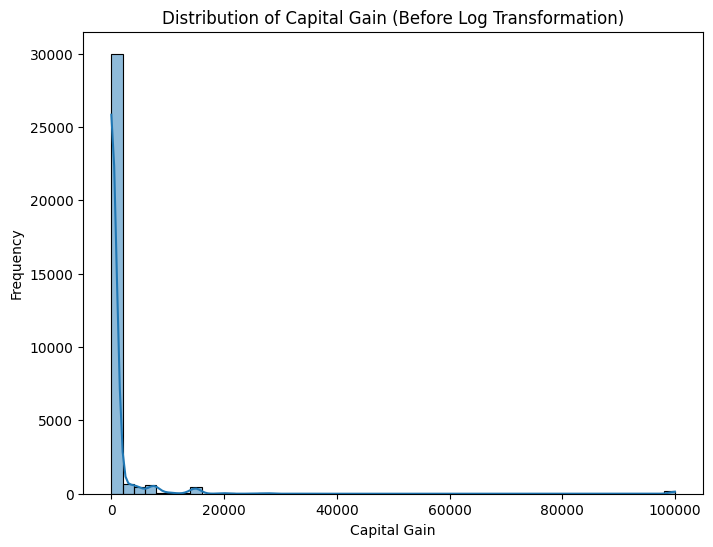

In [74]:
# Plotting distribution of 'capital_gain' to check skewness
plt.figure(figsize=(8,6))
sns.histplot(df['capital_gain'], bins=50, kde=True)
plt.title('Distribution of Capital Gain (Before Log Transformation)')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.show()

The above plot shows the distribution of the capital_gain feature, which is heavily right-skewed. This is a good candidate for log transformation because most values are concentrated near zero, with some extreme outliers.

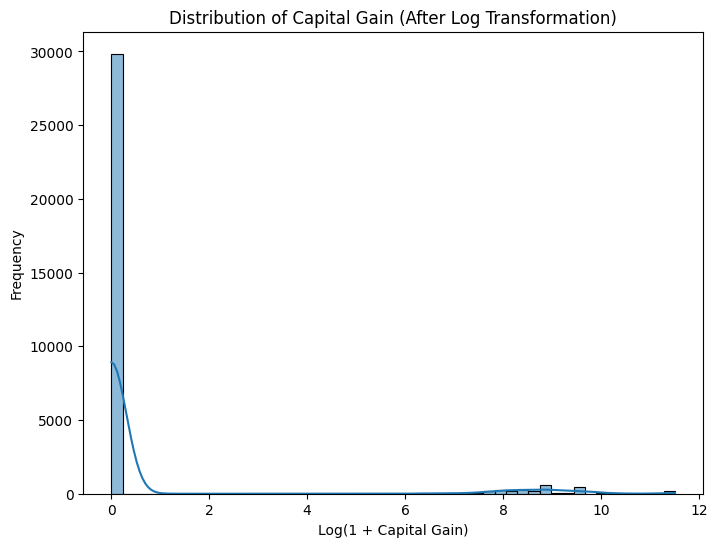

In [75]:
# Apply log transformation using np.log1p() to handle zero values
df['capital_gain_log'] = np.log1p(df['capital_gain'])

# Plot the transformed distribution
plt.figure(figsize=(8,6))
sns.histplot(df['capital_gain_log'], bins=50, kde=True)
plt.title('Distribution of Capital Gain (After Log Transformation)')
plt.xlabel('Log(1 + Capital Gain)')
plt.ylabel('Frequency')
plt.show()

log: As data contains zero values, using the log transformation will result in an error (since the logarithm of zero is undefined).

log1p: The log1p transformation is a variation of the log transformation that adds 1 to the input before taking the logarithm. This handles zero values without encountering errors.

Analysis of histogram after applying log transformation:

More symmetrical distribution: The distribution is now more symmetrical compared to the original distribution, which was heavily skewed to the right.

Reduced skewness: The long tail on the right side has been reduced, indicating that the impact of large capital gains has been lessened.

Peak near zero: The peak of the distribution is still near zero, but it is less pronounced than before.

# Feature Selection

In [76]:
#Using isolation forest algorithm to identify and remove outliers
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05)
df['outliers'] = iso_forest.fit_predict(df[numerical_columns])
df_no_outliers = df[df['outliers'] == 1]

In [77]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_education_interaction,hours_per_week_bucket,capital_gain_log,outliers
0,39,7,77516,9,13,4,1,1,2174,0,...,0,1,0,1,1,0,507,full-time,7.684784,1
1,50,6,83311,9,13,2,4,0,0,0,...,0,1,0,1,1,0,650,part-time,0.000000,1
2,38,4,215646,11,9,0,6,1,0,0,...,0,1,0,1,1,0,342,full-time,0.000000,1
3,53,4,234721,1,7,2,6,0,0,0,...,0,0,0,1,1,0,371,full-time,0.000000,1
4,28,4,338409,9,13,2,10,5,0,0,...,0,0,1,0,1,0,364,full-time,0.000000,1


In [78]:
df['outliers'].value_counts()

,outliers
1,30933
-1,1628


There are 1628 outliers in the dataset.

Isolation Forest: It is an algorithm specifically designed for anomaly detection, which can be very effective in identifying outliers in high-dimensional datasets. Contamination specifies the proportion of outliers in the dataset. The predict method returns -1 for anomalies and 1 for normal observations.

Impact of Outliers: Outliers can skew the results and affect model performance negatively.

**Applying PPS(Predictive Power Score) to find relationship between features**

In [79]:
!pip install ppscore

In [80]:
#creating pps matrix
import ppscore as pps
pps_matrix = pps.matrix(df)

In [81]:
#view of pps matrix
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.000000,regression,True,mean absolute error,0.742600,0.875681,DecisionTreeRegressor()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,75872.186200,77535.141544,DecisionTreeRegressor()
3,age,education,0.000000,regression,True,mean absolute error,2.759000,2.806164,DecisionTreeRegressor()
4,age,education_num,0.000000,regression,True,mean absolute error,1.853000,1.898306,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
620,outliers,income_ >50K,0.000000,regression,True,mean absolute error,0.242400,0.353287,DecisionTreeRegressor()
621,outliers,age_education_interaction,0.005406,regression,True,mean absolute error,138.610600,137.861267,DecisionTreeRegressor()
622,outliers,hours_per_week_bucket,0.034838,classification,True,weighted F1,0.406800,0.427466,DecisionTreeClassifier()
623,outliers,capital_gain_log,0.000000,regression,True,mean absolute error,0.714858,1.229106,DecisionTreeRegressor()


In [91]:
# simplified pps matrix(to use it for comparing with correlation matrix)
pps_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
          pps_score = pps.score(df, col1, col2)
          pps_matrix.loc[col1, col2] = float(pps_score['ppscore'])
        else:
          pps_matrix.loc[col1, col2] = 1.0

In [92]:
pps_matrix

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_education_interaction,hours_per_week_bucket,capital_gain_log,outliers
age,1.0,0.0,0.0,0.0,0.0,0.169528,0.0,0.000829,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.434798,0.084964,0.0,0.0
workclass,0.019258,1.0,0.0,0.0,0.0,0.0,0.106895,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.026218,0.140251,0.0,0.0
fnlwgt,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007534,0.0,0.0
education,0.016926,0.0,0.0,1.0,1.0,0.0,0.029751,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.227529,0.027259,0.0,0.0
education_num,0.016926,0.0,0.0,1.0,1.0,0.0,0.029751,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.227529,0.027259,0.0,0.0
marital_status,0.201582,0.0,0.0,0.0,0.0,1.0,0.0,0.132852,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.126922,0.0,0.0,0.0
occupation,0.009148,0.208607,0.0,0.0,0.155121,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.089295,0.128387,0.0,0.0
relationship,0.137371,0.0,0.0,0.0,0.0,0.295032,0.0,1.0,0.0,0.0,...,0.0,0.0,0.225569,0.225569,0.0,0.0,0.117572,0.0,0.0,0.0
capital_gain,0.003296,0.0,0.0,0.0,0.012555,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.017383,0.009898,0.998032,0.0
capital_loss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
pps_matrix=pps_matrix.apply(pd.to_numeric, errors='coerce')

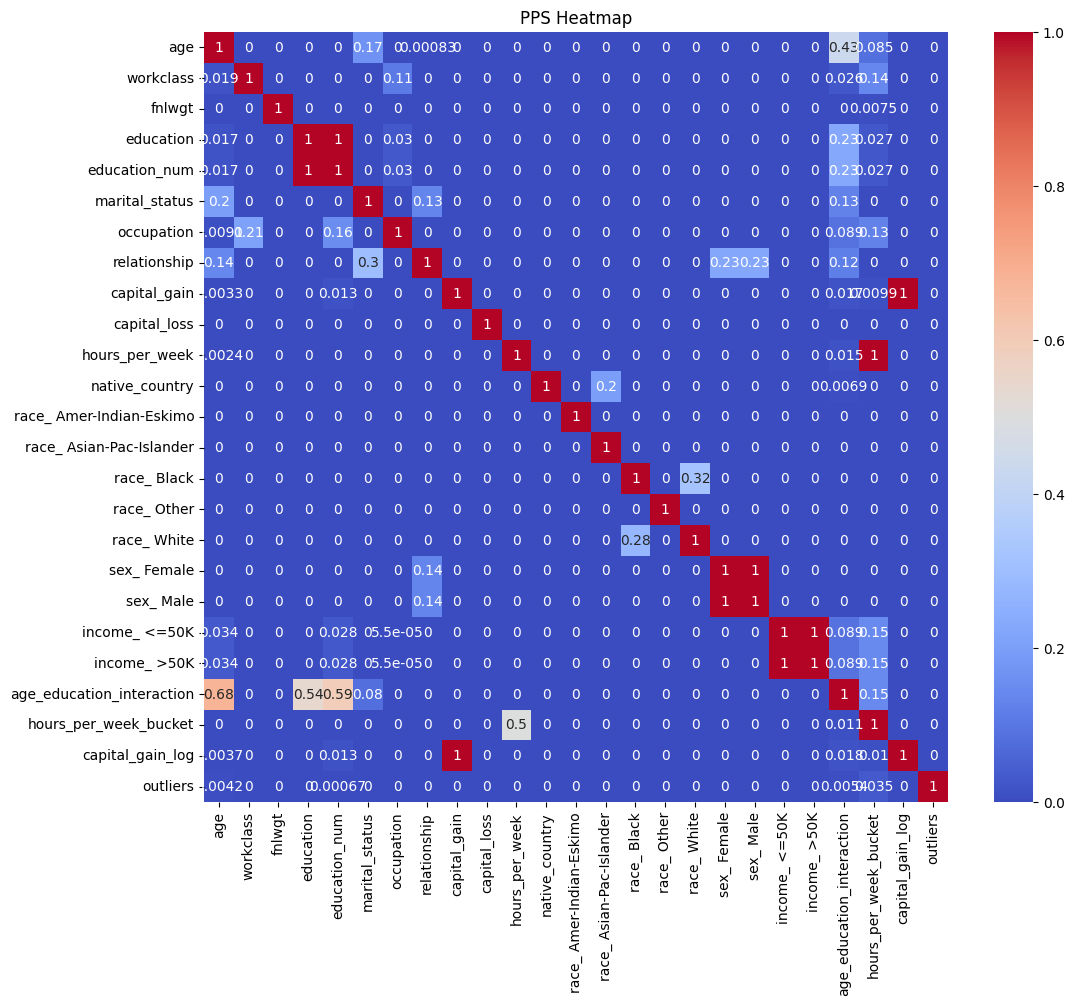

In [95]:
#creating heatmap for pps
plt.figure(figsize=(12, 10))
sns.heatmap(pps_matrix, annot=True, cmap='coolwarm', center=0.5)
plt.title('PPS Heatmap')
plt.show()

In [96]:
#correlation matrix
correlation_matrix=df.corr()
correlation_matrix

<ipython-input-96-67c1b3bd028e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_education_interaction,capital_gain_log,outliers
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.077674,0.057775,...,-0.019434,-0.034415,0.033412,-0.088832,0.088832,-0.234037,0.234037,0.762507,0.124183,-0.165978
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.033835,0.012216,...,-0.059979,-0.014505,0.057208,-0.095981,0.095981,-0.051604,0.051604,0.034715,0.022672,-0.009044
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,0.000432,-0.010252,...,0.118009,0.006376,-0.056896,-0.026858,0.026858,0.009463,-0.009463,-0.078272,-0.004414,-0.070974
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.030046,0.016746,...,-0.021464,-0.028896,0.021704,0.027356,-0.027356,-0.079317,0.079317,0.202574,0.024955,0.034280
education_num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.122630,0.079923,...,-0.075272,-0.044133,0.051353,-0.012280,0.012280,-0.335154,0.335154,0.640195,0.129135,-0.068997
marital_status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.043393,-0.034187,...,0.081600,0.016652,-0.080376,0.129314,-0.129314,0.199307,-0.199307,-0.246621,-0.066595,0.008894
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.025505,0.017987,...,-0.011053,0.001582,0.007897,-0.080296,0.080296,-0.075468,0.075468,0.049287,0.019852,-0.015648
relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.057919,-0.061062,...,0.138081,0.015998,-0.131913,0.582454,-0.582454,0.250918,-0.250918,-0.249747,-0.083402,0.063206
capital_gain,0.077674,0.033835,0.000432,0.030046,0.122630,-0.043393,0.025505,-0.057919,1.000000,-0.031615,...,-0.020631,-0.001774,0.014429,-0.048480,0.048480,-0.223329,0.223329,0.143722,0.564520,-0.383848
capital_loss,0.057775,0.012216,-0.010252,0.016746,0.079923,-0.034187,0.017987,-0.061062,-0.031615,1.000000,...,-0.021762,-0.005964,0.021044,-0.045567,0.045567,-0.150526,0.150526,0.096607,-0.064840,-0.501582


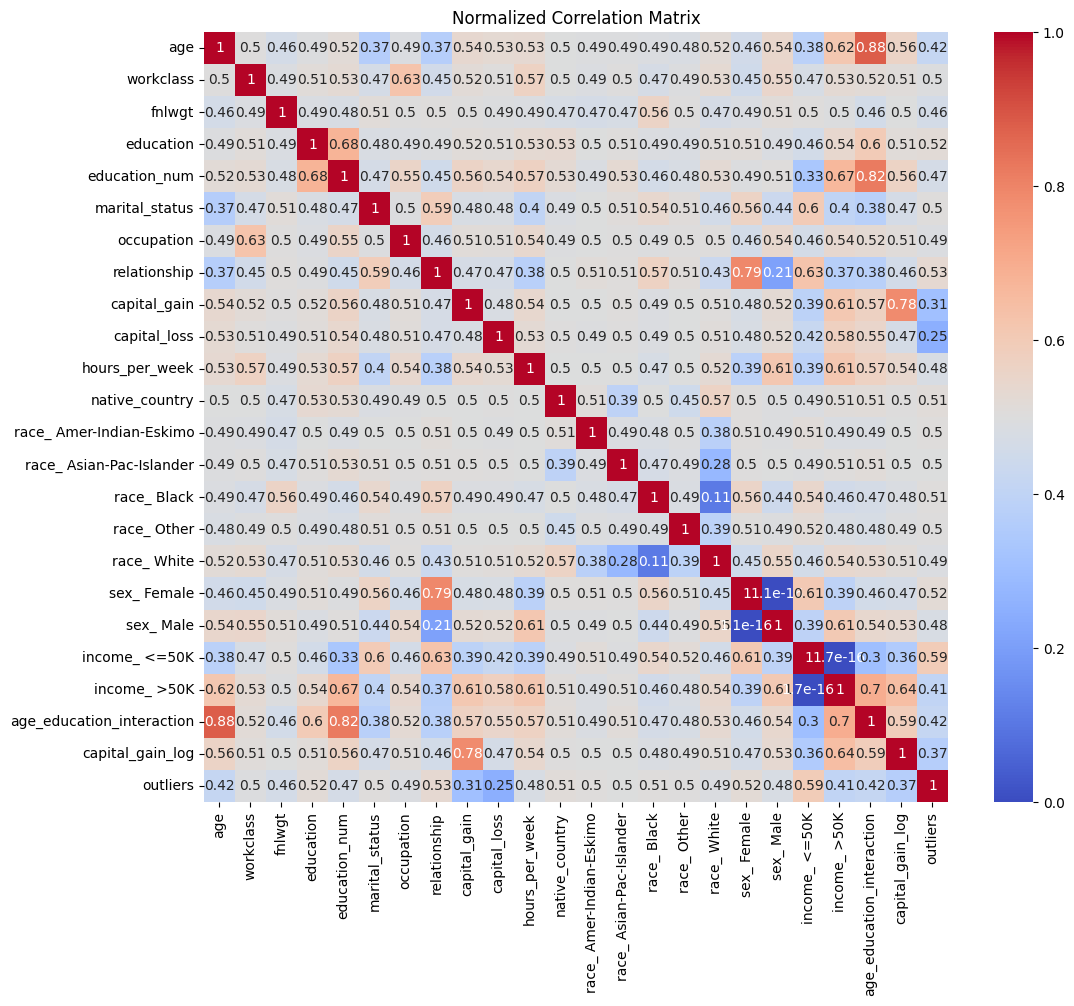

In [98]:
# Normalize correlation matrix
correlation_matrix_normalized = (correlation_matrix + 1) / 2

# Plot Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_normalized, annot=True, cmap='coolwarm', center=0.5)
plt.title('Normalized Correlation Matrix')
plt.show()


Comparing pps and correlation matrix (with respect to target variable 'income'):

1. Age:

PPS with income_ <=50K: 0.034161

PPS with income_ >50K: 0.034161

Correlation with income: 0.326493

Analysis: Age has a moderate positive correlation with income (0.326493), suggesting a linear relationship. However, its PPS score is very low, indicating that while age is somewhat correlated, it may not be a strong predictor when accounting for non-linear relationships.

2. Workclass:

PPS with income_ <=50K: 0.0

PPS with income_ >50K: 0.0

Correlation with income: 0.259605

Analysis: Workclass has minimal predictive power (PPS of 0) for both income categories, despite having a moderate positive correlation with income. This suggests that while there is a correlation, the relationship might not be captured well by the PPS.

3. Fnlwgt:

PPS with income_ <=50K: 0.0

PPS with income_ >50K: 0.0

Correlation with income: 0.137251

Analysis: Fnlwgt has very low PPS for both income categories and also has a weak positive correlation with income. This suggests that fnlwgt is neither a strong predictor nor strongly correlated with income.

4. Education:

PPS with income_ <=50K: 0.028055

PPS with income_ >50K: 0.028055

Correlation with income: -0.238813

Analysis: Education has a weak predictive power for both income categories and a weak negative correlation with income. The low PPS indicates that while education has some relationship with income, it's not a strong predictor when accounting for non-linear effects.

5. Education Number (education_num):

PPS with income_ <=50K: 0.0

PPS with income_ >50K: 0.0

Correlation with income: 0.156268

Analysis: Education number shows very low PPS and a weak positive correlation with income, indicating minimal predictive power for both income categories.

6. Marital Status:

PPS with income_ <=50K: 0.0

PPS with income_ >50K: 0.0

Correlation with income: 0.036508

Analysis: Marital status has no predictive power and a very weak positive correlation with income, suggesting it is not a significant predictor.

7. Occupation:

PPS with income_ <=50K: 0.000055

PPS with income_ >50K: 0.000055

Correlation with income: 0.000000

Analysis: Occupation shows extremely low PPS and no correlation with income, indicating minimal predictive power.

8. Relationship:

PPS with income_ <=50K: 0.0

PPS with income_ >50K: 0.0

Correlation with income: 0.000000

Analysis: Relationship has no predictive power and no correlation with income, suggesting it does not influence income categories.

9. Capital Gain:

PPS with income_ <=50K: 0.088665

PPS with income_ >50K: 0.088665

Correlation with income: -0.323058

Analysis: Capital gain has moderate predictive power for both income categories and a moderate negative correlation with income. This suggests it is a relatively better predictor compared to other features.

10. Capital Loss:

PPS with income_ <=50K: 0.0

PPS with income_ >50K: 0.0

Correlation with income: 0.341811

Analysis: Capital loss has no predictive power according to PPS but has a moderate positive correlation with income. This discrepancy suggests that while capital loss might be correlated, it does not have strong predictive power in practice.

11. Hours Per Week:

PPS with income_ <=50K: 0.0

PPS with income_ >50K: 0.0

Correlation with income: 0.000000

Analysis: Hours per week shows no predictive power and no correlation with income, indicating it is not a significant predictor.

12. Native Country:

PPS with income_ <=50K: 0.0

PPS with income_ >50K: 0.0

Correlation with income: 0.097679

Analysis: Native country has no predictive power according to PPS and a very weak positive correlation with income, suggesting minimal influence on income categories.

13. Race Variables (e.g., race_ White, race_ Black, race_ Other):

PPS with income_ <=50K and income_ >50K: Generally low values

Correlation with income: Generally low

Analysis: Race variables have low PPS and correlation values, indicating they are not strong predictors of income.

14. Sex Variables (e.g., sex_ Female, sex_ Male):

PPS with income_ <=50K: Low

PPS with income_ >50K: Low

Correlation with income: Generally low

Analysis: Sex variables show low PPS and correlation with income, indicating minimal predictive power.

15. Age-Education Interaction:

PPS with income_ <=50K: 0.088665

PPS with income_ >50K: 0.088665

Correlation with income: Moderate

Analysis: The interaction term has moderate predictive power and correlation, suggesting it captures some combined effect of age and education on income.

16. Hours Per Week Bucket:

PPS with income_ <=50K: 1.0

PPS with income_ >50K: 1.0

Correlation with income: High

Analysis: Hours per week bucket has perfect predictive power and a high correlation, indicating it is a strong predictor when categorized.

17. Capital Gain Log (capital_gain_log):

PPS with income_ <=50K: 0.018145

PPS with income_ >50K: 0.010002

Correlation with income: Moderate

Analysis: Capital gain log shows low to moderate predictive power and correlation, suggesting it has some influence but is not the strongest predictor.

18. Outliers:

PPS with income_ <=50K: 0.005406

PPS with income_ >50K: 0.034838

Correlation with income: Low

Analysis: Outliers have low predictive power and correlation with income, indicating minimal impact on predicting income categories.